# Crawling Danawa
---
# 1. 다나와 페이지 크롤링

In [1]:
import numpy as np
import pandas as pd

from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service


In [2]:
driver = webdriver.Chrome(service = Service('../chromedriver/chromedriver.exe'))
url = 'http://search.danawa.com/dsearch.php?k1=무선청소기'
driver.get(url)

In [3]:
html = driver.page_source

soup = BeautifulSoup(html, 'html.parser')
soup

<html class="js no-touch" lang="ko" xml:lang="ko" xmlns="http://www.w3.org/1999/xhtml"><head>
<title>무선청소기 : 다나와 통합검색</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="무선청소기 통합검색 : 다나와 통합검색" name="title"/>
<meta content="'무선청소기'의 다나와 통합검색 결과입니다." name="description"/>
<meta content="무선청소기, 다나와, 최저가, 가격비교, 검색, 통합검색, 샤오미 무선청소기, 차이슨 무선청소기, 다이슨 무선청소기, 무선청소기 삼성전자, 일렉트로룩스 무선청소기, 무선청소기 아이닉 i20, 디베아 차이슨 무선청소기 2021년형, 무선청소기 테팔, 삼성 비스포크 제트 무선청소기, 디베아 무선청소기" name="keywords"/>
<meta content="무선청소기 통합검색 : 다나와 통합검색" property="og:title"/>
<meta content="'무선청소기'의 다나와 통합검색 결과입니다." property="og:description"/>
<meta content="http://img.danawa.com/new/tour/img/logo/sns_danawa.jpg" property="og:image"/>
<meta content="width=1280" name="viewport"/>
<link href="//img.danawa.com/new/danawa_main/v1/img/danawa_favicon.ico" rel="shortcut icon"/>
<link href="//static.danawa.com/css/common.css?v=2201051636" rel="styleshee

In [4]:
prod_items = soup.select('div.main_prodlist > ul.product_list > li.prod_item ')
len(prod_items)

# prod_items[0].select('a.click_log_product_standard_title_')[0].text
title = prod_items[0].select('p.prod_name > a')[0].text
spec_list = prod_items[0].select('div.spec_list')[0].text.strip()
price = prod_items[0].select('li.rank_one > p.price_sect > a > strong')[0].\
text.strip().replace(',', "")
print(title, spec_list, price, sep = '   |||  ')

LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571   |||  핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W / [성능] 흡입력: 210W / 2중터보싸이클론 / 스마트인버터모터 / [배터리] 충전시간: 4시간 / 사용시간(개당): 1시간 / 분리형 (2개) / 리튬이온 / [필터] 분리형배기필터 / 헤파필터 / H13급 / 5단계여과 / [기능] 자동물공급 / 배터리잔량표시 / IoT기능 / 자동먼지비움 / [구성] 바닥 / 물걸레 / 침구 / 솔형 / 틈새 / 올인원타워 / [부가] 색상: 카밍베이지 / 무게: 2.6kg / 크기(가로x세로x깊이): 250x1120x260mm   |||  1057790


In [5]:
prod_data = []
for prod_item in prod_items:
    if 'product-pot' in prod_item['class']:
        continue
    try:
        title = prod_item.select('p.prod_name > a')[0].text.strip()
        spec_list = prod_item.select('div.spec_list')[0].text.strip()
        price = prod_item.select('li.rank_one > p.price_sect > a > strong')[0].text.strip().replace(",", "")
        prod_data.append([title, spec_list, price])
    except:
        pass
print(len(prod_data))
print(prod_data)

40
[['LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571', '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W / [성능] 흡입력: 210W / 2중터보싸이클론 / 스마트인버터모터 / [배터리] 충전시간: 4시간 / 사용시간(개당): 1시간 / 분리형 (2개) / 리튬이온 / [필터] 분리형배기필터 / 헤파필터 / H13급 / 5단계여과 / [기능] 자동물공급 / 배터리잔량표시 / IoT기능 / 자동먼지비움 / [구성] 바닥 / 물걸레 / 침구 / 솔형 / 틈새 / 올인원타워 / [부가] 색상: 카밍베이지 / 무게: 2.6kg / 크기(가로x세로x깊이): 250x1120x260mm', '1057790'], ['삼성전자 비스포크 제트 VS20A956A3', '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 흡입력: 210W / 제트싸이클론 / 디지털인버터모터 / [배터리] 충전시간: 3시간30분 / 사용시간(개당): 1시간 / 분리형 (1개) / 리튬이온 / [필터] 5단계여과 / [기능] 자동물공급 / 디스플레이표시창 / 배터리잔량표시 / 자동먼지비움 / [구성] 바닥 / 솔형 / 틈새 / 연장툴 / 청정스테이션 / [부가] 먼지통용량: 0.5L / 색상: 미스티화이트 / 무게: 2.5kg / 액세서리크래들  / 크기(가로x세로x깊이): 250x930x202mm', '564850'], ['LG전자 코드제로 ThinQ A9S AS9370IKT', '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W / [성능] 흡입력: 210W / 2중터보싸이클론 / 스마트인버터모터 / [배터리] 충전시간: 4시간 / 사용시간(개당): 1시간 / 분리형 (1개) / 리튬이온 / [필터] 헤파필터 / H13급 / 5단계여과 / [기능] 자동물공급 / 배터리잔량표시 / IoT기능 / 자동먼지비움 / [구성] 바닥 / 물걸레 / 솔형 / 틈새 / 올인원타워 / [부가] 색상: 

In [6]:
def get_prod_items(pro_items):
    prod_data = []
    for prod_item in prod_items:
        if 'product-pot' in prod_item['class']:
            continue
        try:
            title = prod_item.select('p.prod_name > a')[0].text.strip()
            spec_list = prod_item.select('div.spec_list')[0].text.strip()
            price = prod_item.select('li.rank_one > p.price_sect > a > strong')[0].text.strip().replace(",", "")
            prod_data.append([title, spec_list, price])
        except:
            pass

    return(prod_data)  

In [7]:
prod_data = get_prod_items(prod_items)
print(len(prod_data))

40


---
# 2. 여러페이지 크롤링

In [8]:
import time
from tqdm import tqdm_notebook

In [9]:
def get_search_page_url(keyword, page):
    url = 'http://search.danawa.com/dsearch.php?query={0}&originalQuery={0}&volumeType=allvs&page={1}&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2606&defaultVaTab=390042&tab=goods'.\
    format(keyword, page)
    return(url)
url = get_search_page_url('무선청소기', '1')
print(url)

http://search.danawa.com/dsearch.php?query=무선청소기&originalQuery=무선청소기&volumeType=allvs&page=1&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2606&defaultVaTab=390042&tab=goods


In [10]:
keyword = '무선청소기'
total_page = 10
prod_data_total_app = []

for page in tqdm_notebook(range(1, total_page+1)):
    url = get_search_page_url(keyword, page)
    driver.get(url)
    
    time.sleep(5)
    
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    prod_items = soup.select('div#productListArea > div.main_prodlist > ul.product_list > li.prod_item')
    prod_item_list = get_prod_items(prod_items)
    
    prod_data_total_app.append(prod_item_list)

C:\Users\kk135\AppData\Local\Temp/ipykernel_9096/35664002.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for page in tqdm_notebook(range(1, total_page+1)):


  0%|          | 0/10 [00:00<?, ?it/s]

In [11]:
prod_data_total = np.array(prod_data_total_app).reshape(-1, 3)
data = pd.DataFrame(prod_data_total)
data.columns = ['상품명', '스펙 목록', '가격']
data.head()

,상품명,스펙 목록,가격
0,LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W...,1057790
1,삼성전자 비스포크 제트 VS20A956A3,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 흡입력: ...,564850
2,LG전자 코드제로 ThinQ A9S AS9370IKT,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W...,796950
3,샤오미 CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매),"차량용청소기 / 무선 / 흡입력: 16,800Pa / 최대출력: 120W / 헤파필...",60090
4,삼성전자 비스포크 제트 VS20A957E3,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 흡입력: ...,790050


In [12]:
data.to_excel('./files/vacuum_crawling.xlsx',
             index = False)

# 3. 데이터 정리

In [13]:
company_list = []
product_list = []

for title in data['상품명']:
    try:
        
        title_info  = title.split(" ", 1)
        company_name = title_info[0]
        product_name = title_info[1]

        company_list.append(company_name)
        product_list.append(product_name)
        
    except:
#         pass
        company_list.append(None)
        product_list.append(None)


In [14]:
spec_list = data['스펙 목록'][0].split(' / ')
category = spec_list[0].strip()

for spec in spec_list:
    if '사용시간' in spec:
        use_time_spec = spec
    elif '흡입력' in spec:
        suction_spec = spec
print(use_time_spec)
print(suction_spec)

use_time_value = use_time_spec.split(': ')[1].strip()
suction_value = suction_spec.split(': ')[1].strip()

print(use_time_value)
print(suction_value)

사용시간(개당): 1시간
[성능] 흡입력: 210W
1시간
210W


In [15]:
category_list = []
use_time_list = []
suction_list = []

for spec_data in data['스펙 목록']:
    spec_list = spec_data.split(' / ')
    
    category = spec_list[0].strip()
    category_list.append(category)    

    
    for spec in spec_list:
        if '사용시간' in spec :
            use_time_spec = spec
        elif '흡입력' in spec:
            suction_spec = spec


    use_time_value = use_time_spec.split(': ')[1].strip()
    suction_value = suction_spec.split(': ')[1].strip()
    use_time_list.append(use_time_value)
    suction_list.append(suction_value)

In [16]:
print(category_list[:5])
print(use_time_list[:5])
print(suction_list[:5])

['핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '차량용청소기', '핸디/스틱청소기']
['1시간', '1시간', '1시간', '30분', '1시간']
['210W', '210W', '210W', '16,800Pa', '210W']


In [17]:
def convert_time_minute(time):
    
    try:
        if '시간' in time:
            hour = time.split('시간')[0]

            if '분' in time:
                minute = time.split('시간')[-1].split('분')[0]
            else:
                minute = 0
        else:
            hour = 0
            minute = time.split('분')[0]
         
        return int(hour)*60 + int(minute)
        
    except:
        return None       

In [18]:
new_use_time_list = []
for time in use_time_list:
    value = convert_time_minute(time)
    new_use_time_list.append(value)
    
new_use_time_list[:10]    

[60, 60, 60, 30, 60, 60, 45, 60, 60, 45]

In [19]:
def get_suction(value):
    try:
        value = value.upper()
        
        if "AW" in value or "W" in value:
            result = value.replace("A", "").replace("W", "").replace(",", "")
            result = int(result)
            
        elif "PA" in value:
            result = value.replace("PA", "").replace(",", "")
            result = int(result)/100
        else:
            result = None
        return result
        
    except:
        return None

In [20]:
new_suction_list = []
for power in suction_list:
    value = get_suction(power)
    new_suction_list.append(value)
    
new_suction_list[:10]    

[210, 210, 210, 168.0, 210, 200.0, 150.0, 220.0, 210, 210]

In [21]:
pd_data = pd.DataFrame()
pd_data['카테고리'] = category_list
pd_data['회사명'] = company_list
pd_data['제품'] = product_list
pd_data['가격'] = data['가격'].astype(np.int32)
pd_data['사용시간'] = new_use_time_list
pd_data['흡입력'] = new_suction_list
pd_data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AO9571,1057790,60.0,210.0
1,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A956A3,564850,60.0,210.0
2,핸디/스틱청소기,LG전자,코드제로 ThinQ A9S AS9370IKT,796950,60.0,210.0
3,차량용청소기,샤오미,CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매),60090,30.0,168.0
4,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A957E3,790050,60.0,210.0


In [22]:
condition = pd_data['카테고리'] == '핸디/스틱청소기'

pd_data_final = pd_data[condition]
len(pd_data_final)


# pd_data_final.to_excel('../7_Best_Product/files/2_danawa_data_final_class.xlsx',
#                       index = False)

pd_data_final.dropna(inplace = True)

pd_data_final.info()
pd_data_final.to_excel('./files/vacuum_final.xlsx',
                      index = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283 entries, 0 to 399
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   카테고리    283 non-null    object 
 1   회사명     283 non-null    object 
 2   제품      283 non-null    object 
 3   가격      283 non-null    int32  
 4   사용시간    283 non-null    float64
 5   흡입력     283 non-null    float64
dtypes: float64(2), int32(1), object(3)
memory usage: 14.4+ KB


C:\Users\kk135\Anaconda3\envs\bigdata\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


# 4. 시각화

In [23]:
danawa_data = pd.read_excel('./files/vacuum_final.xlsx')
danawa_data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AO9571,1057790,60,210
1,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A956A3,564850,60,210
2,핸디/스틱청소기,LG전자,코드제로 ThinQ A9S AS9370IKT,796950,60,210
3,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A957E3,790050,60,210
4,핸디/스틱청소기,샤오미,TROUVER POWER 11,73950,60,200


In [24]:
top_list = danawa_data.sort_values(['흡입력'], ascending=False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
150,핸디/스틱청소기,리하스,LH20,184000,120,330
218,핸디/스틱청소기,비브르,스톰파워 VE35,235000,50,310
137,핸디/스틱청소기,아이닉,NEW i20,188000,50,300
17,핸디/스틱청소기,DIBEA,차이슨 ALLNEW29000,248000,48,290
238,핸디/스틱청소기,캐치웰,NEW F8,189000,25,290


In [25]:
top_list = danawa_data.sort_values(["사용시간"], ascending = False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
150,핸디/스틱청소기,리하스,LH20,184000,120,330
74,핸디/스틱청소기,샤오미,드리미 T30,399000,90,270
22,핸디/스틱청소기,샤오미,드리미 V11,194880,90,250
21,핸디/스틱청소기,샤오미,드리미 V12,282060,90,270
274,핸디/스틱청소기,샤오미,드리미 V12 프로,408270,85,270


In [26]:
top_list = danawa_data.sort_values(["사용시간","흡입력"], ascending = False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
150,핸디/스틱청소기,리하스,LH20,184000,120,330
21,핸디/스틱청소기,샤오미,드리미 V12,282060,90,270
74,핸디/스틱청소기,샤오미,드리미 T30,399000,90,270
22,핸디/스틱청소기,샤오미,드리미 V11,194880,90,250
274,핸디/스틱청소기,샤오미,드리미 V12 프로,408270,85,270


In [27]:
price_mean_value = danawa_data['가격'].mean()
suction_mean_value = danawa_data['흡입력'].mean()
use_time_mean_value = danawa_data['사용시간'].mean()
print("가격 평균값", price_mean_value)
print("흡입력 평균값", suction_mean_value)
print("사용시간 평균값", use_time_mean_value)

가격 평균값 368068.0918727915
흡입력 평균값 168.6572438162544
사용시간 평균값 43.840989399293285


In [28]:
condition_data = danawa_data [
    (danawa_data['가격'] <= price_mean_value) & 
    (danawa_data['흡입력'] >= suction_mean_value) & 
    (danawa_data['사용시간'] >= use_time_mean_value)]
condition_data

,카테고리,회사명,제품,가격,사용시간,흡입력
4,핸디/스틱청소기,샤오미,TROUVER POWER 11,73950,60,200
5,핸디/스틱청소기,샤오미,드리미 V10,155700,60,220
7,핸디/스틱청소기,일렉트로룩스,WELL Q6 WQ61-1OGG,125870,45,210
13,핸디/스틱청소기,델로라,V11 파워 300W,104990,70,220
17,핸디/스틱청소기,DIBEA,차이슨 ALLNEW29000,248000,48,290
21,핸디/스틱청소기,샤오미,드리미 V12,282060,90,270
22,핸디/스틱청소기,샤오미,드리미 V11,194880,90,250
24,핸디/스틱청소기,DIBEA,M24 MAX,139000,50,250
31,핸디/스틱청소기,일렉트로룩스,퓨어 Q9 파워프로 PQ92-3OBF,276140,53,210
36,핸디/스틱청소기,샤오미,드리미 V11SE,180430,60,240


In [29]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns
# import platform 

rc('font', family = 'Malgun Gothic')

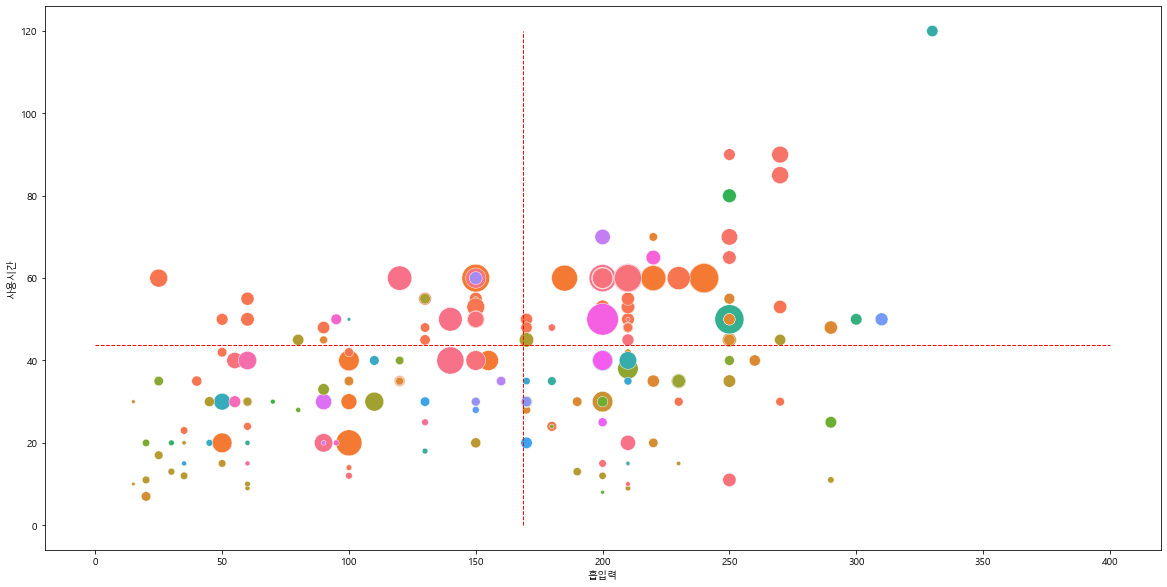

In [30]:
plt.figure(figsize = (20, 10))
sns.scatterplot(x = '흡입력', y = '사용시간',
               size = '가격', hue = danawa_data['회사명'],
               data = danawa_data, legend = False,
               sizes = (10, 1000))
plt.hlines(use_time_mean_value, 0, 400, color='red', 
           linestyle='dashed', linewidth=1)
plt.vlines(suction_mean_value, 0, 120, color='red', 
           linestyle='dashed', linewidth=1)
plt.show()

In [31]:
chart_data_selected = top_list[:20]
chart_data_selected

,카테고리,회사명,제품,가격,사용시간,흡입력
150,핸디/스틱청소기,리하스,LH20,184000,120,330
21,핸디/스틱청소기,샤오미,드리미 V12,282060,90,270
74,핸디/스틱청소기,샤오미,드리미 T30,399000,90,270
22,핸디/스틱청소기,샤오미,드리미 V11,194880,90,250
274,핸디/스틱청소기,샤오미,드리미 V12 프로,408270,85,270
125,핸디/스틱청소기,모온,오비큠 플러스,269000,80,250
123,핸디/스틱청소기,샤오미,드리미 T20,379000,70,250
13,핸디/스틱청소기,델로라,V11 파워 300W,104990,70,220
244,핸디/스틱청소기,에이스전자,에이스 K7,337470,70,200
105,핸디/스틱청소기,샤오미,G10,256950,65,250


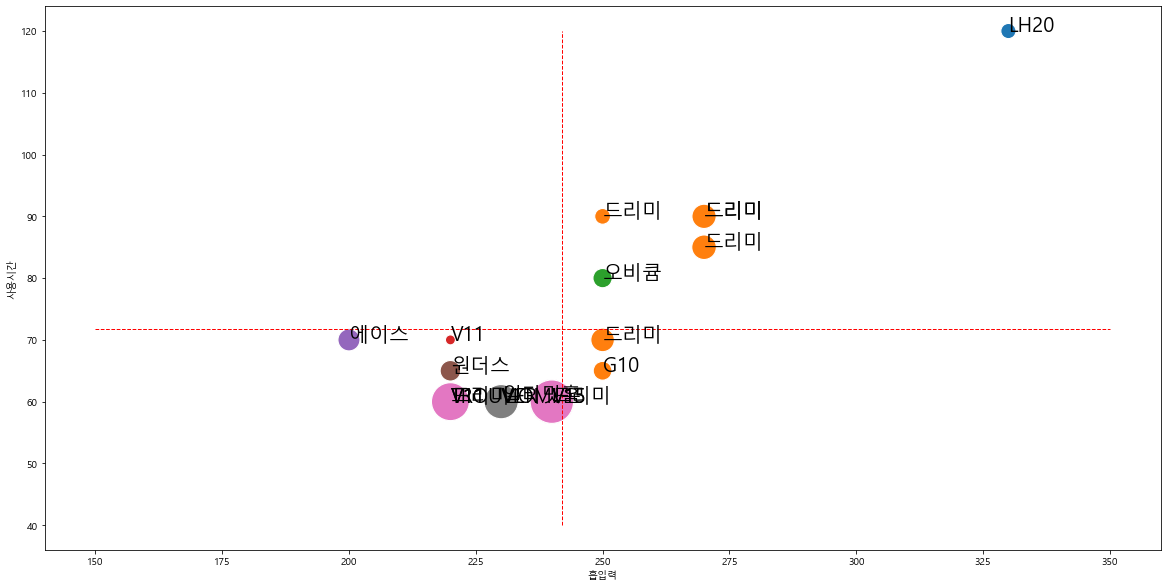

In [32]:
# suction_max_value = chart_data_selected['흡입력'].max()
suction_mean_value = chart_data_selected['흡입력'].mean()
# use_time_max_value = chart_data_selected['사용시간'].max()
use_time_mean_value = chart_data_selected['사용시간'].mean()

plt.figure(figsize = (20, 10))
sns.scatterplot(x = '흡입력', y = '사용시간',
               size = '가격', hue = chart_data_selected['회사명'],
               data = chart_data_selected, legend = False,
               sizes = (100, 2000))
plt.hlines(use_time_mean_value, 150, 350, color='red', 
           linestyle='dashed', linewidth=1)
plt.vlines(suction_mean_value, 40, 120, color='red', 
           linestyle='dashed', linewidth=1)

for index, row in chart_data_selected.iterrows():
    x = row['흡입력']
    y = row['사용시간']
    s = row['제품'].split(' ')[0]
    plt.text(x, y, s, size=20)
    
    
plt.show()